In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


from random import choices
color_ls = '1234567890'*10
def color():
    return '#'+''.join(choices(color_ls , k=6))

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


In [2]:
# loading the Dataset
df = pd.read_csv('../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv')
print('csv file loaded')

csv file loaded


In [3]:
# viewing the full data set
df


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
0,Andaman and Nicobar,7629,10,7490,129,0.13,98.18,1.69
1,Andhra Pradesh,2055999,8310,2033447,14242,0.40,98.90,0.69
2,Arunachal Pradesh,54865,389,54196,280,0.71,98.78,0.51
3,Assam,604536,4114,594506,5916,0.68,98.34,0.98
4,Bihar,725983,34,716288,9661,0.00,98.66,1.33
5,Chandigarh,65273,43,64410,820,0.07,98.68,1.26
6,Chhattisgarh,1005485,211,991705,13569,0.02,98.63,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10672,2,10666,4,0.02,99.94,0.04
8,Delhi,1439136,399,1413649,25088,0.03,98.23,1.74
9,Goa,176980,748,172907,3325,0.42,97.70,1.88


In [4]:
# viewing  information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
# Checking for Null values
df.isna().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
dtype: int64

In [6]:
# Describing our Data
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.426475e+05,6573.416667,9.235636e+05,12510.416667,0.844722,97.885556,1.269722
std,1.402439e+06,20266.732736,1.366932e+06,23974.990571,2.525466,2.419832,0.566485
min,7.629000e+03,2.000000,7.490000e+03,4.000000,0.000000,84.420000,0.040000
25%,8.374850e+04,130.000000,8.234925e+04,819.000000,0.030000,97.730000,0.962500
50%,4.750775e+05,357.500000,4.640715e+05,5525.500000,0.355000,98.345000,1.305000
75%,1.011743e+06,4171.750000,9.982072e+05,13737.250000,0.642500,98.722500,1.582500
max,6.573092e+06,117237.000000,6.397018e+06,139470.000000,15.250000,99.940000,2.750000


In [7]:
# How Many States data we have
df['State/UTs'].unique().size

36

In [8]:
# Difining numerical and categorical features lists
cat_col = ['State/UTs']
num_col = ['Total Cases', 'Active', 'Discharged', 'Deaths', 'Active Ratio', 'Discharge Ratio', 'Death Ratio']

**Average `Total` , `Active` , `Discharged` and `Deaths`**

In [9]:
avg_active_cases = df.Active.mean()
avg_deaths = df.Deaths.mean()
avg_discharged = df.Discharged.mean()
avg_total_cases = df['Total Cases'].mean()
print(f'Average Total Cases Over All states : {avg_total_cases:>20.2f}')
print(f'Average Patient Discharged Over All states : {avg_discharged:>13.2f}')
print(f'Average Deaths Over All states : {avg_deaths:>24.2f}' )
print(f'Average Active Cases Over All states : {avg_active_cases:>17.2f}')

Average Total Cases Over All states :            942647.47
Average Patient Discharged Over All states :     923563.64
Average Deaths Over All states :                 12510.42
Average Active Cases Over All states :           6573.42


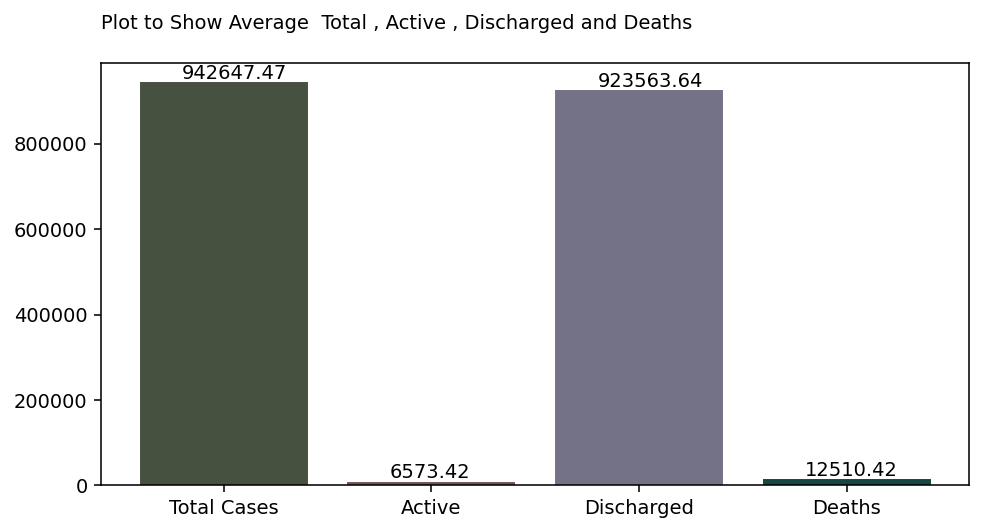

In [10]:
ls = [avg_total_cases ,avg_active_cases, avg_discharged , avg_deaths  ]
plt.figure(dpi=140 , figsize=(8,4))
plt.title('Plot to Show Average  Total , Active , Discharged and Deaths\n' , fontdict={'c':'k' , 'size':10 } ,loc='left')
bars = plt.bar(df.columns[1:-3] , ls )
for bar in bars:
    bar.set_color(color())
    plt.text(bar.get_x()+bar.get_width()/4 , bar.get_height()+10000 , s = f'{bar.get_height():.2f}' )
plt.show()

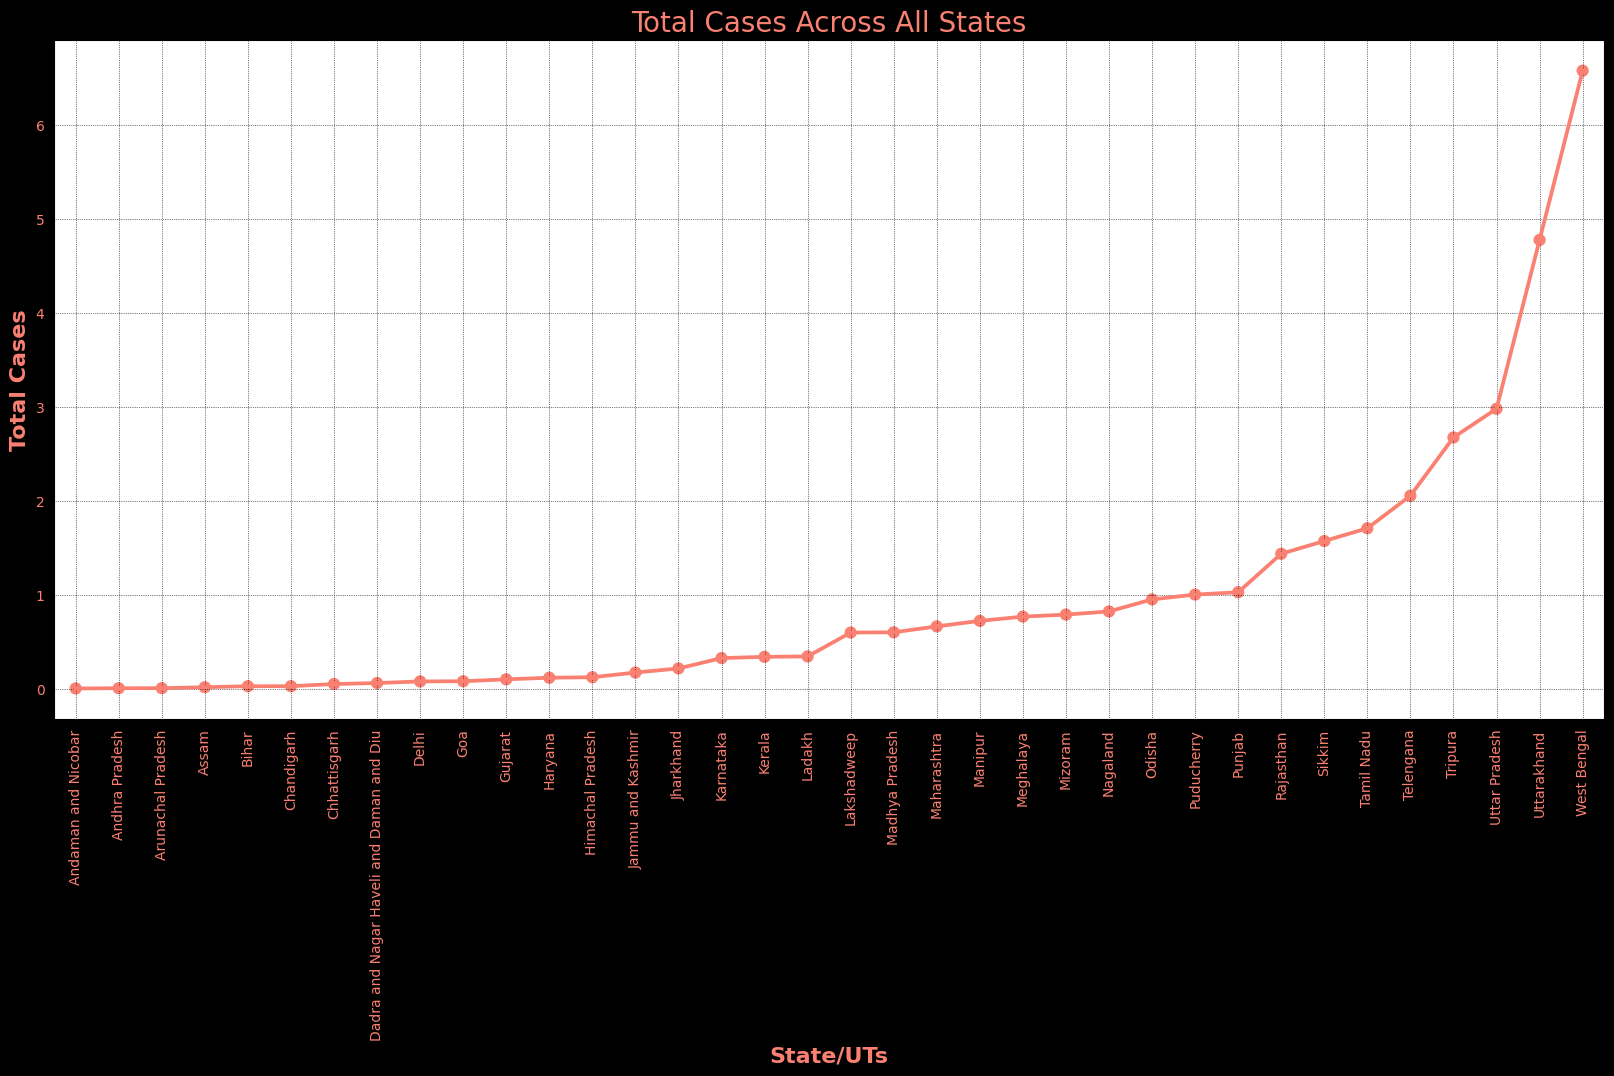

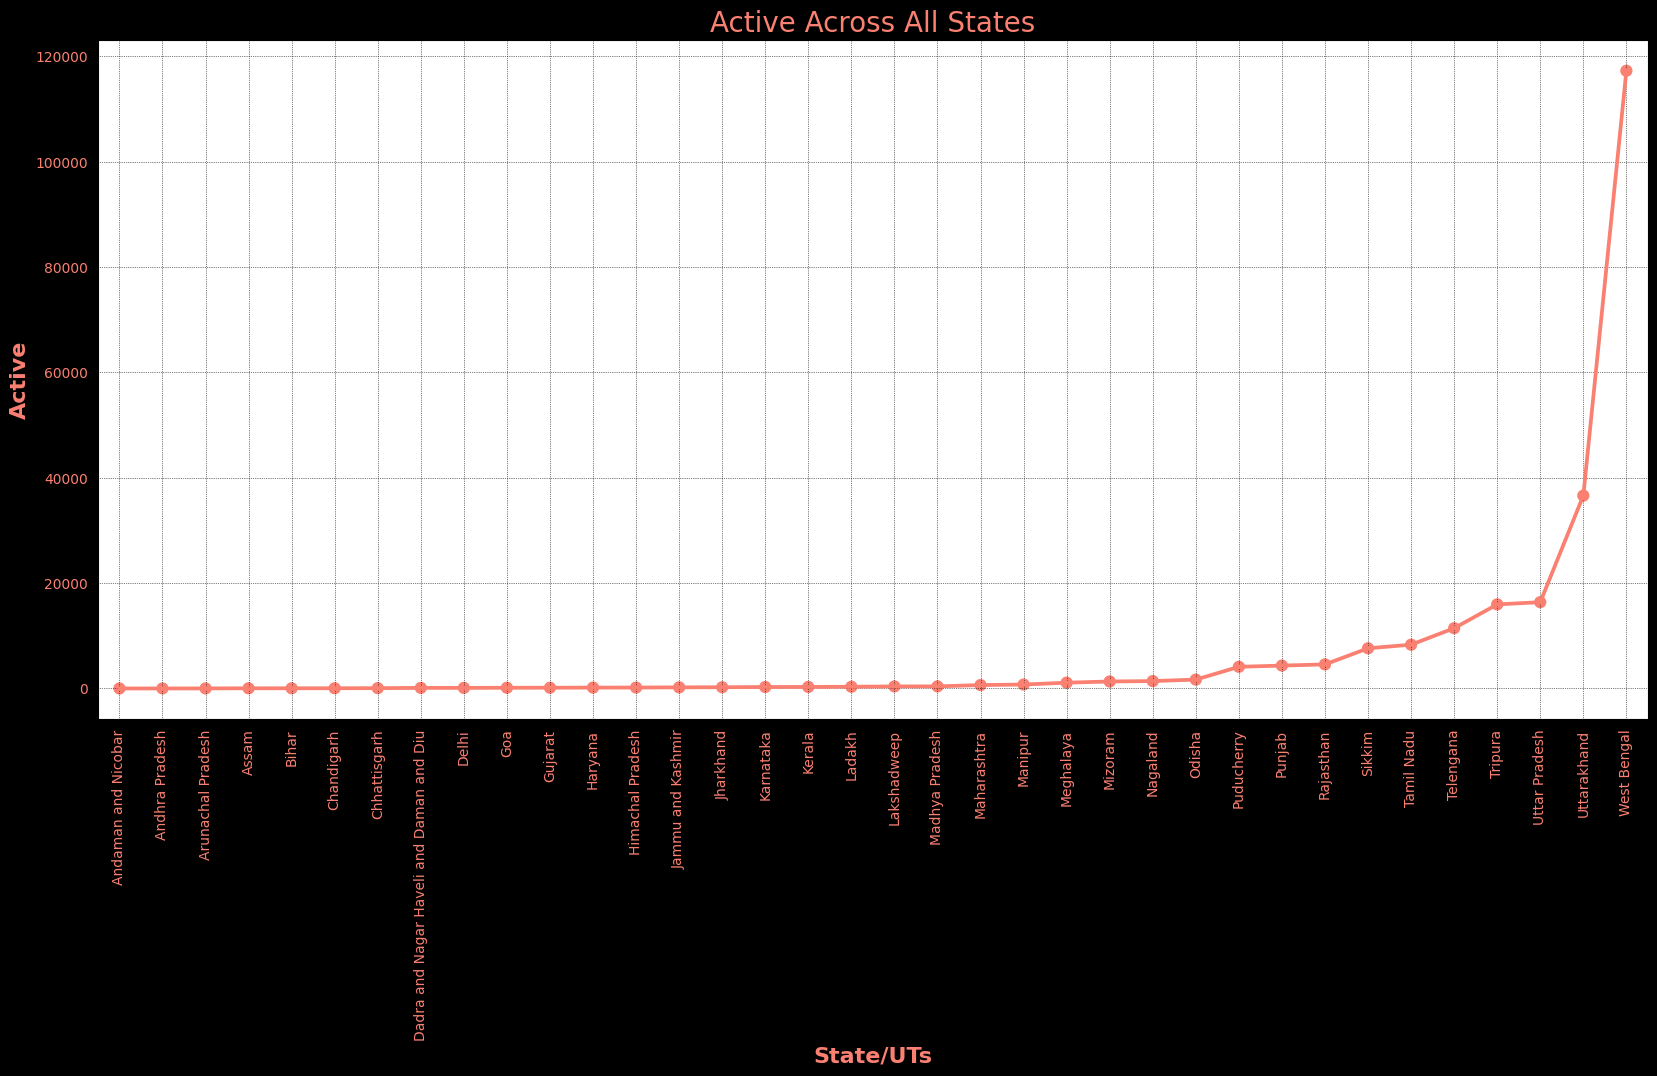

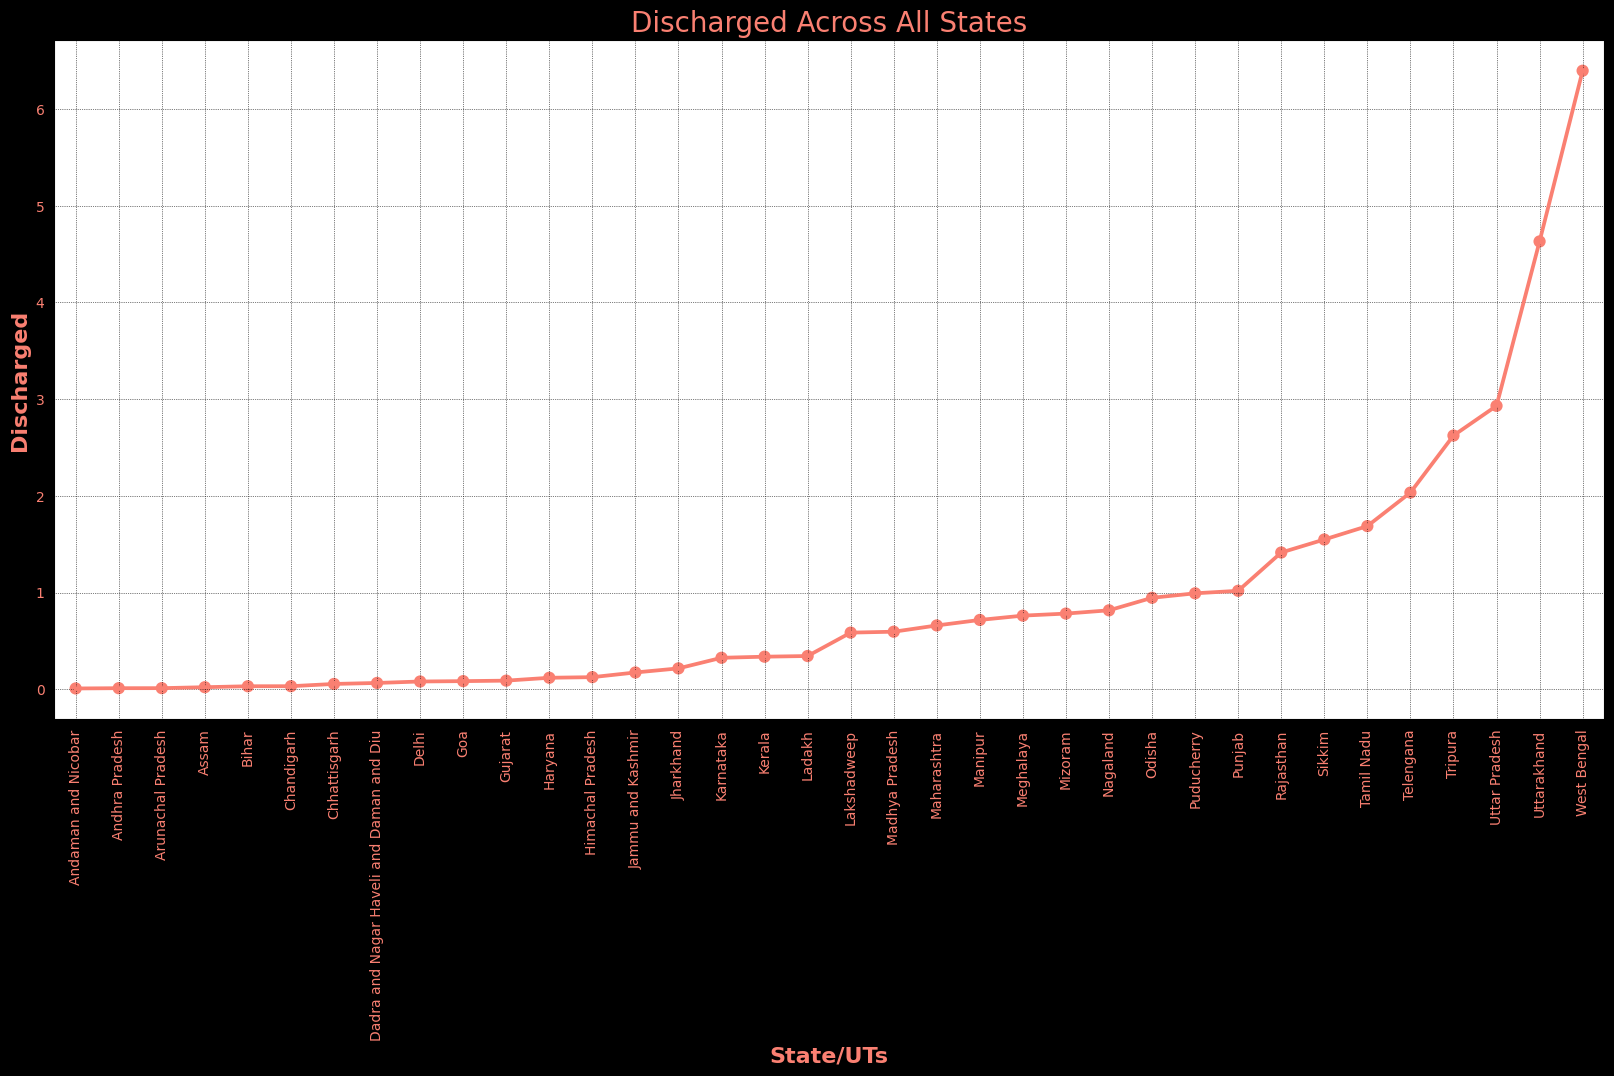

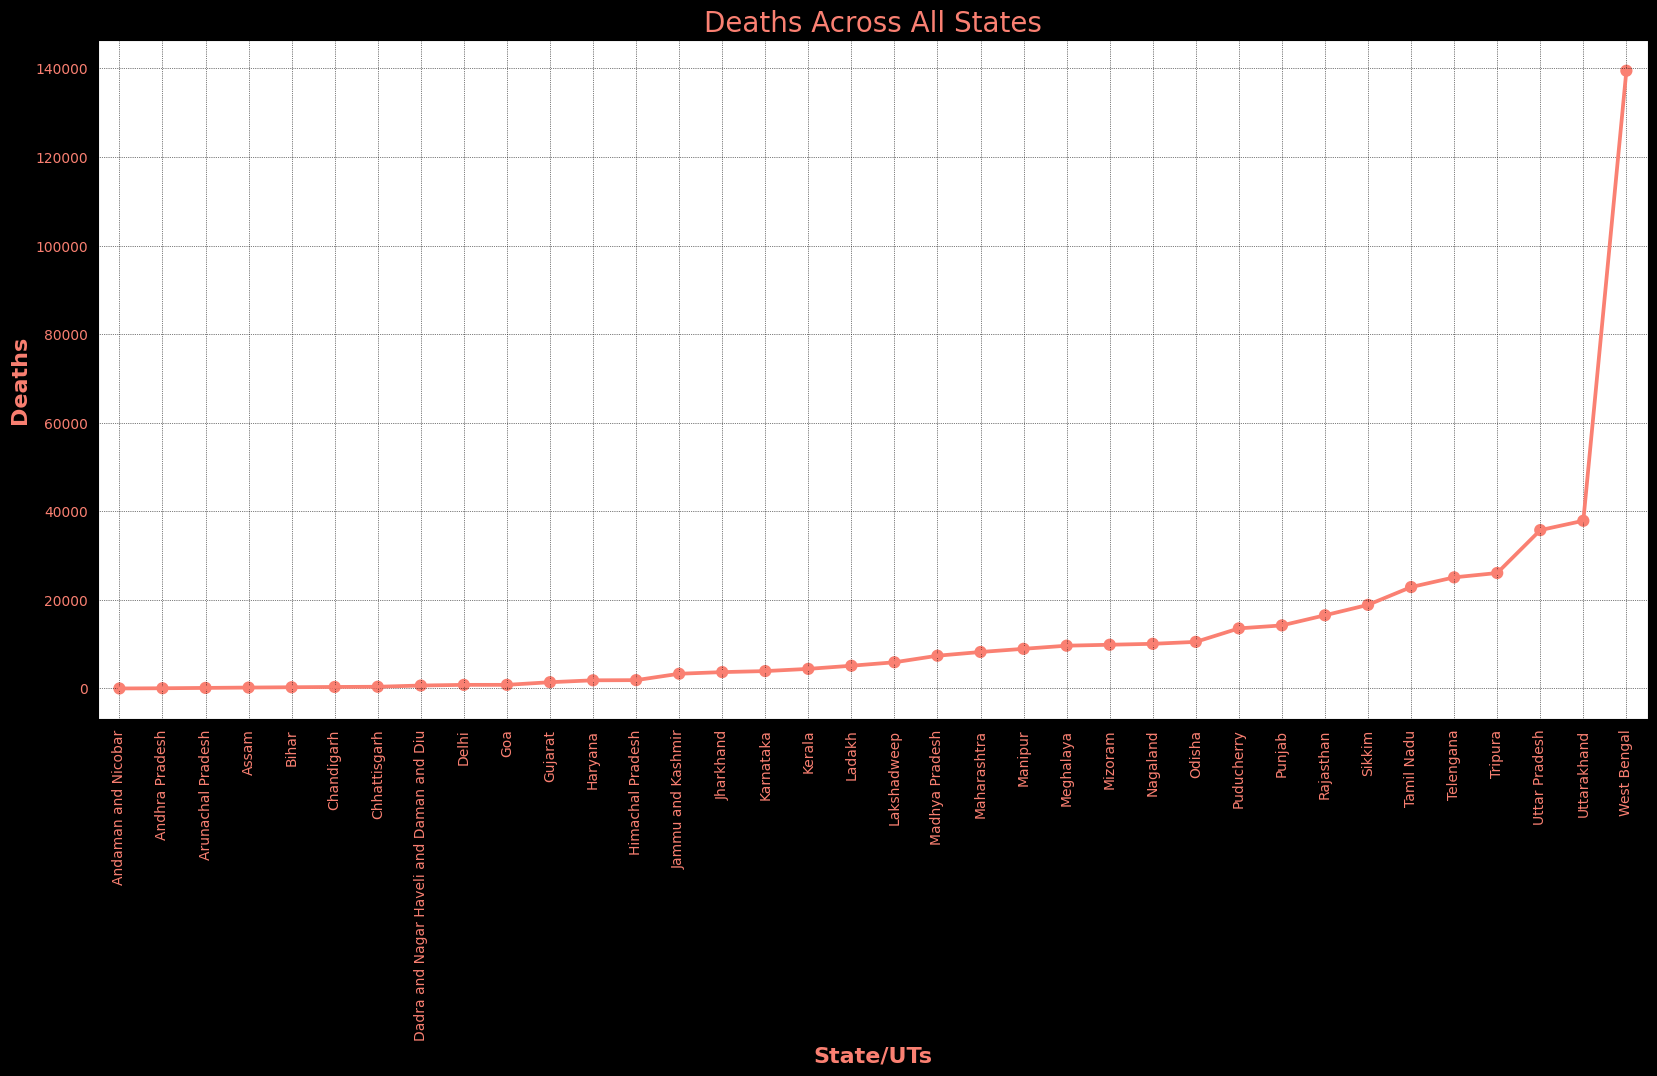

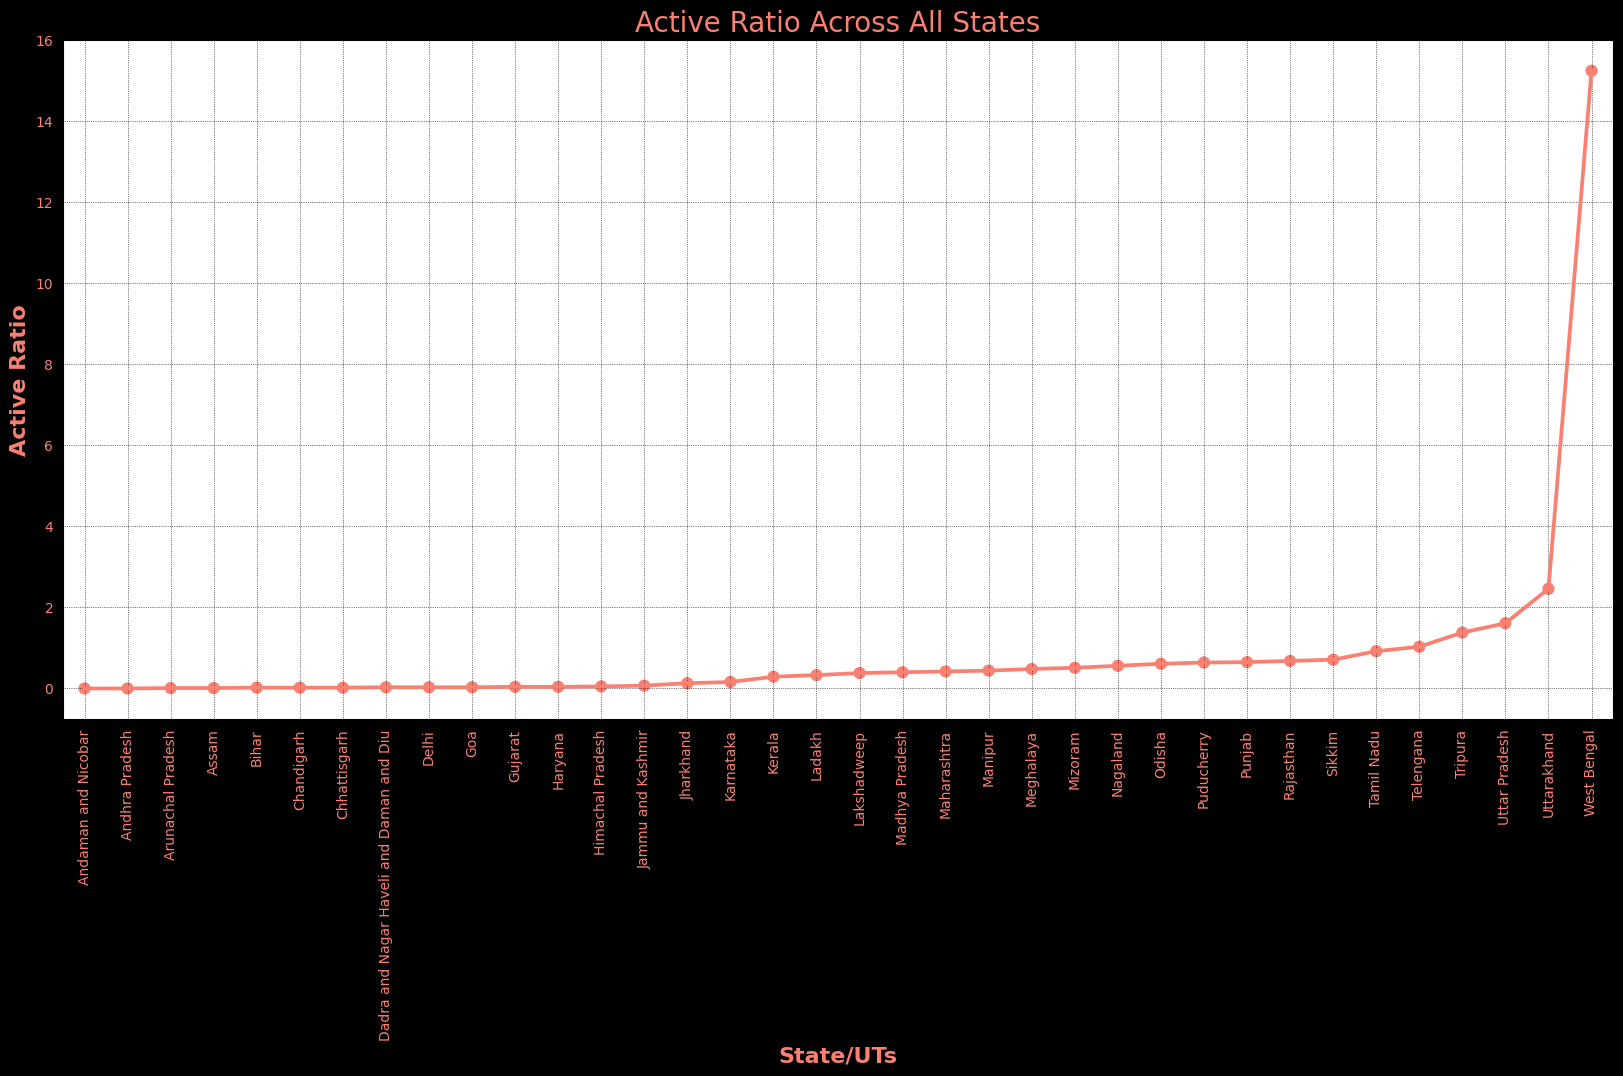

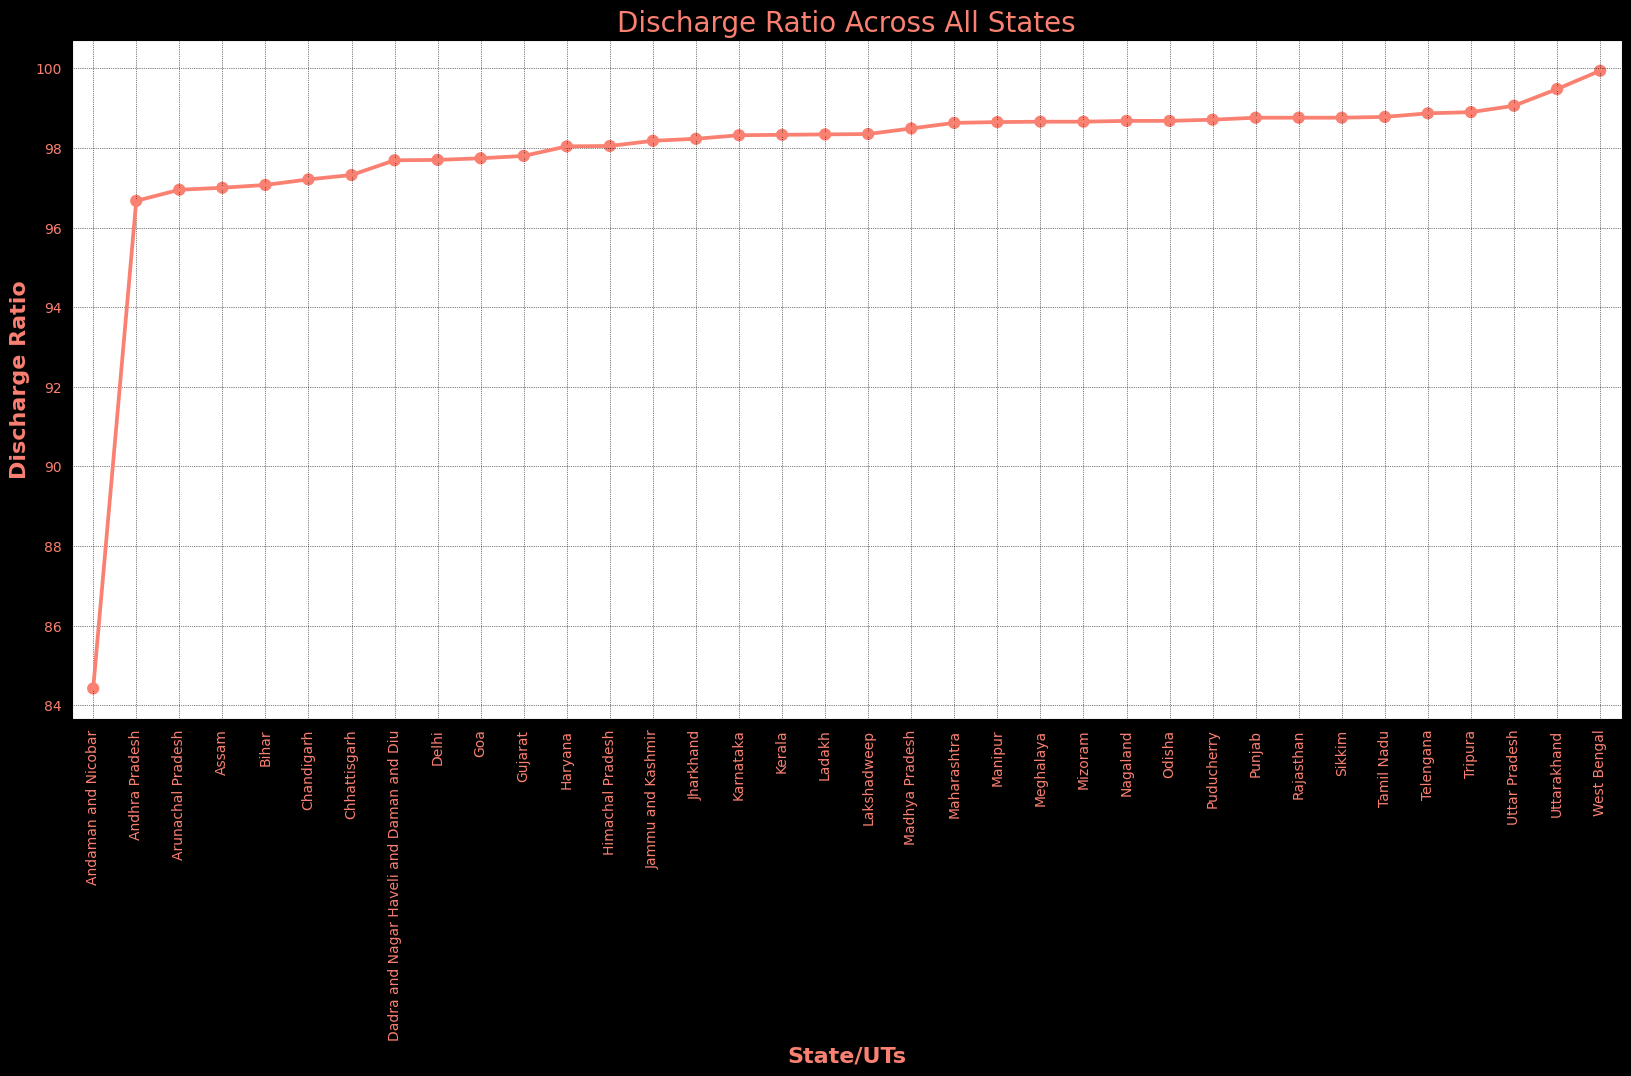

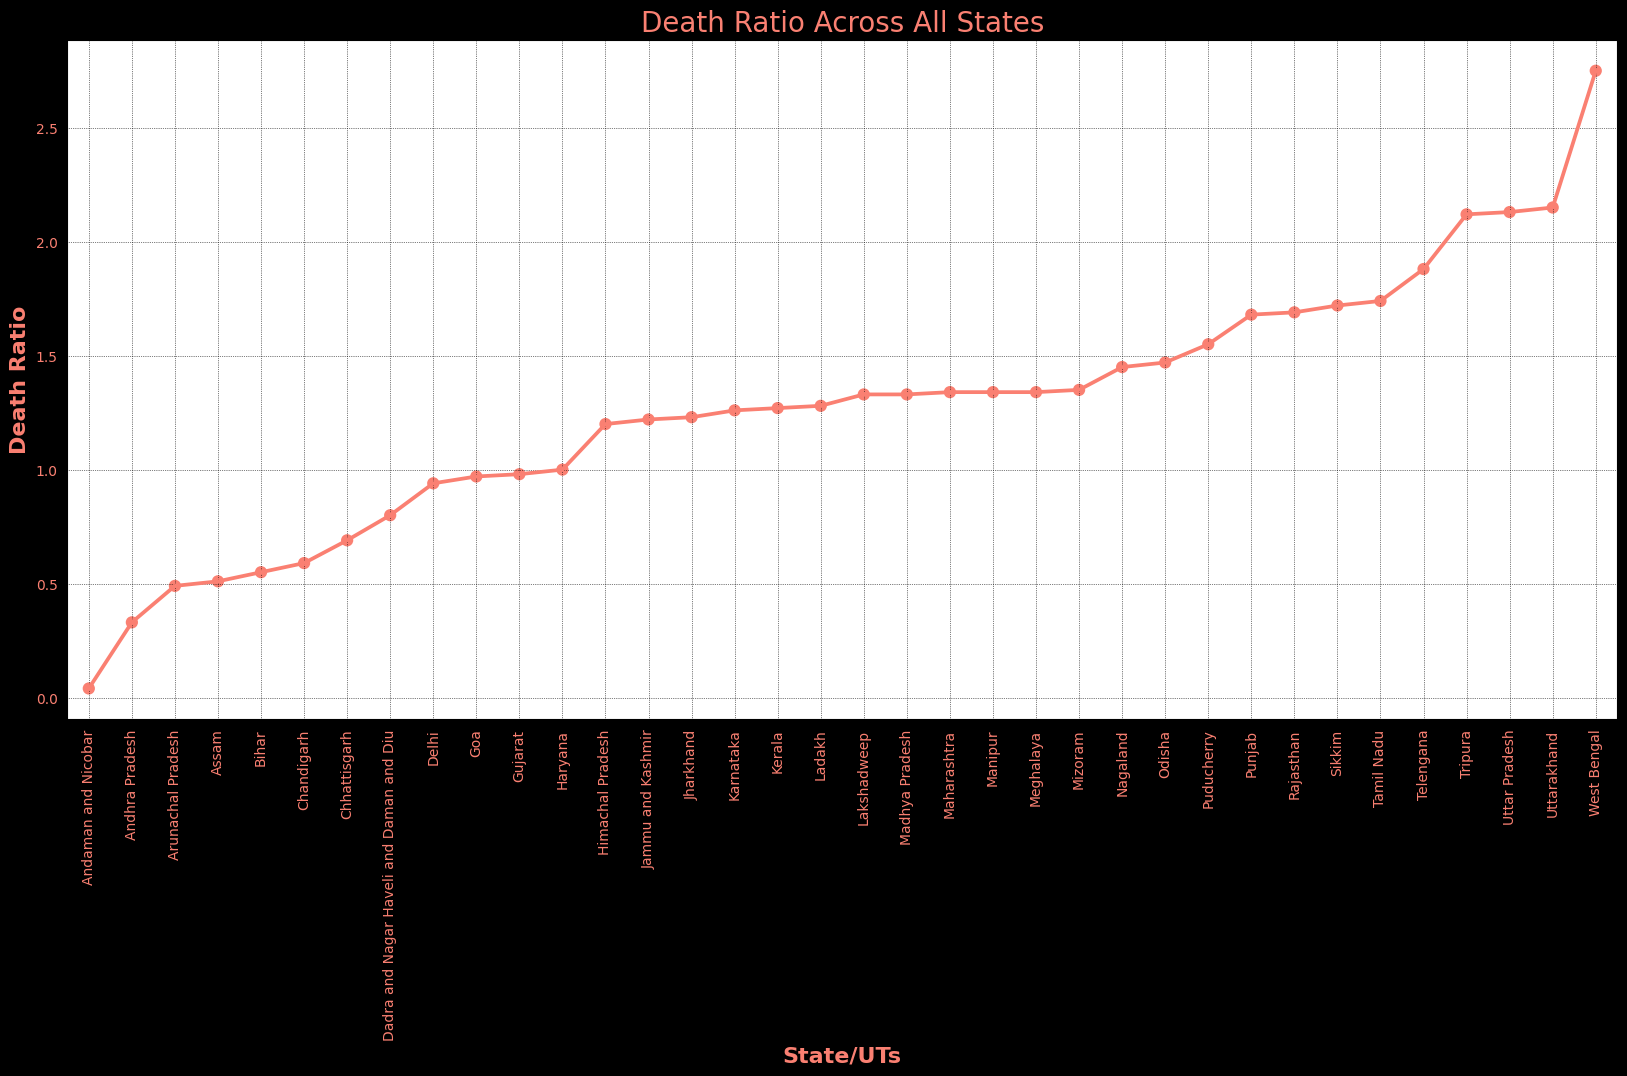

In [11]:
# plot to see distribution of all frautures across all states
for f in num_col:
    df1 = df.sort_values(by=[f],axis=0 , ignore_index=True)
    plt.figure(dpi=100 , figsize=(20 ,9) ,facecolor='black')
    plt.title(f'{f} Across All States' , color='salmon' ,size=20)
    sns.pointplot(df['State/UTs'] , df1[f] , color='salmon')
    plt.xticks(rotation=90 , color='salmon')
    plt.yticks(color='salmon')
    plt.grid(ls=':' ,color='black' ,lw=.5)
    plt.xlabel('State/UTs' ,fontdict={'size':16 , 'weight':'heavy','color':'salmon'})
    plt.ylabel(f ,fontdict={'size':16 , 'weight':'heavy','color':'salmon'})
    plt.show()
    print('\n\n\n\n\n')

In [12]:
# Function to Plot Average numerical features pre State

def plot_avg(x_val , y_val):
    plt.figure(dpi=100 , figsize=(10 ,5))
    bars = plt.bar(x_val , y_val ,)
    for bar in bars:
        bar.set_color(color())
    plt.xlabel('States',fontdict={'size':14 , 'c':'red'})
    plt.xticks(rotation=90)
    plt.ylabel(num_features , fontdict={'size':14,'c':'red'})
    plt.title(f'Average {num_features} Per State',fontdict={'c':'#1E4A17','size':'20'})
    plt.show()   

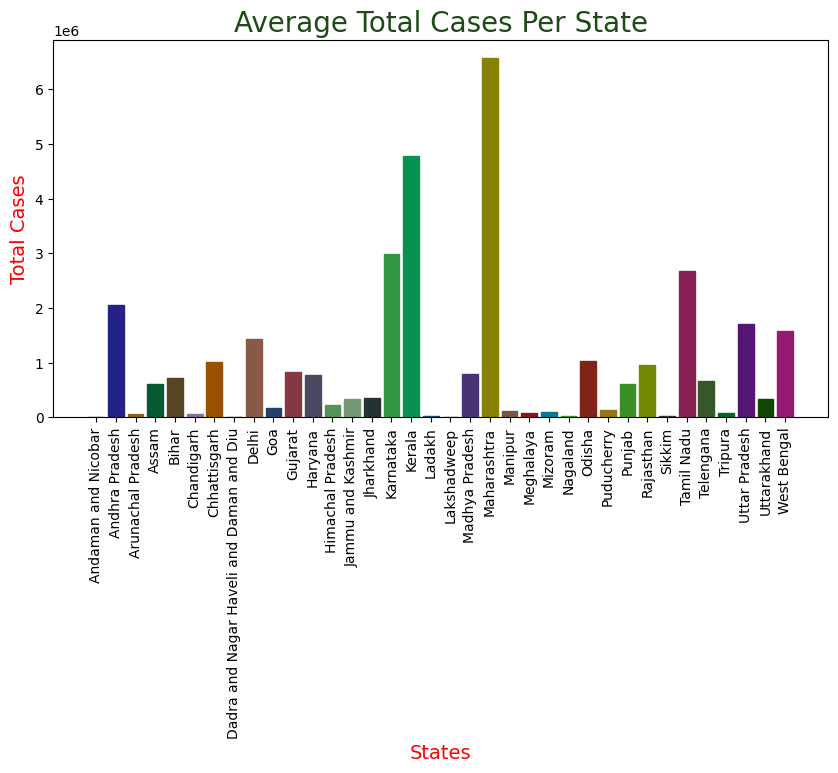

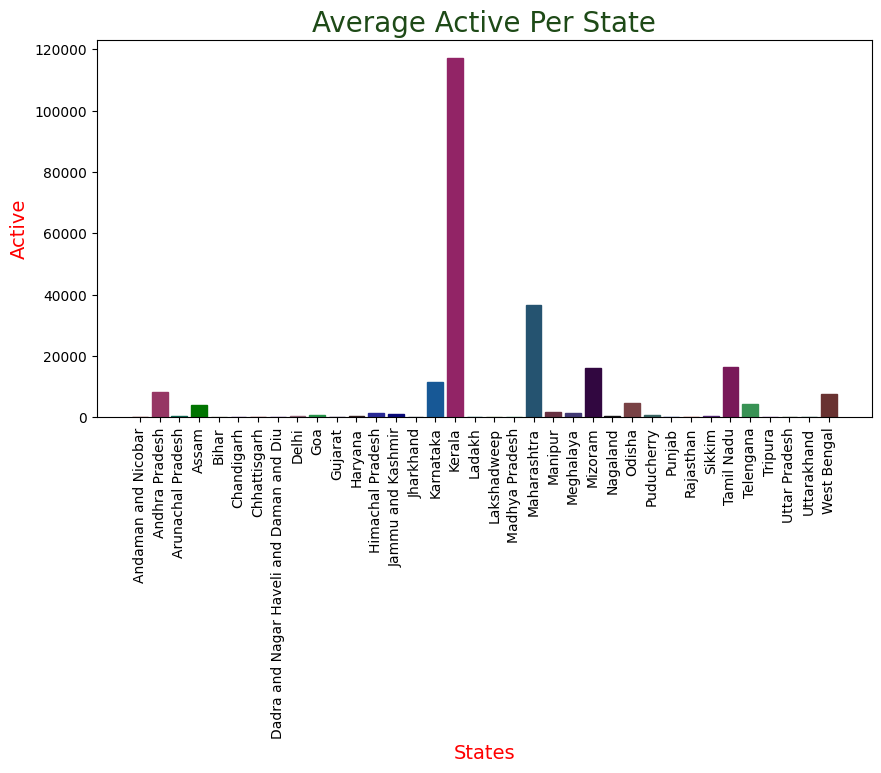

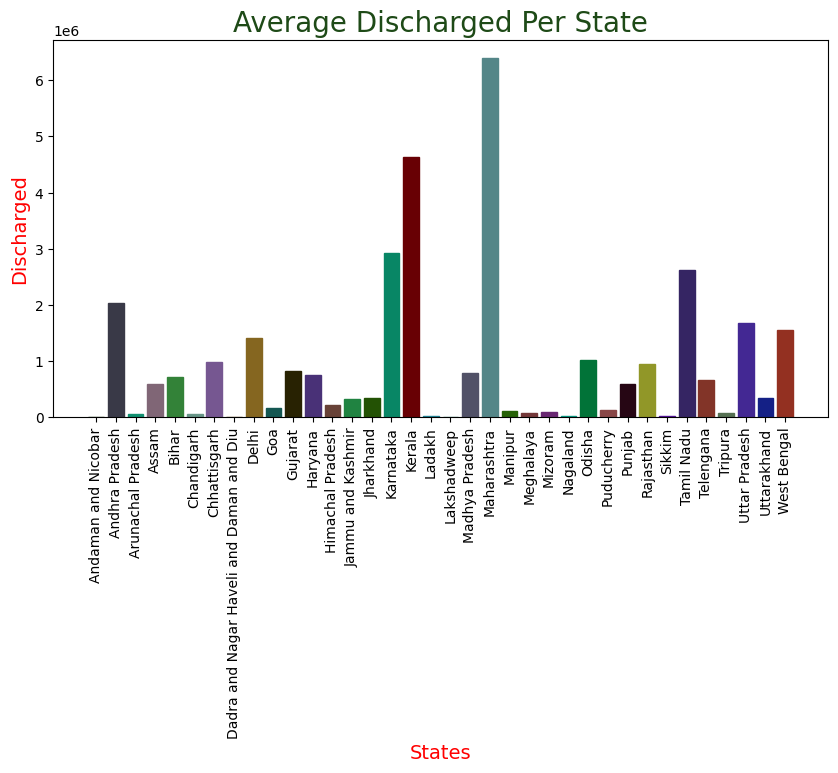

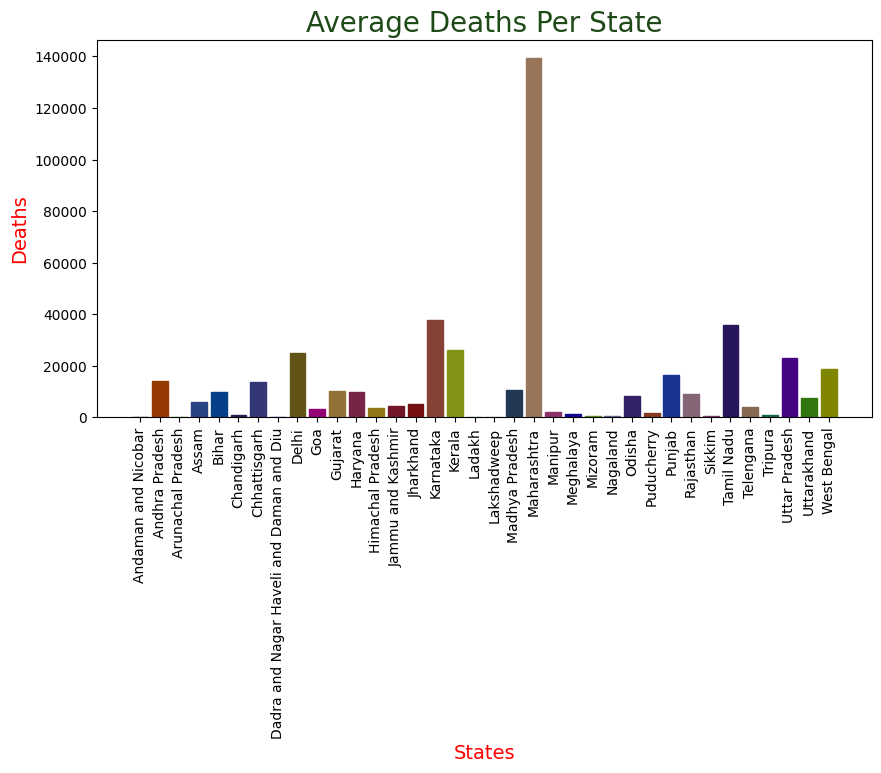

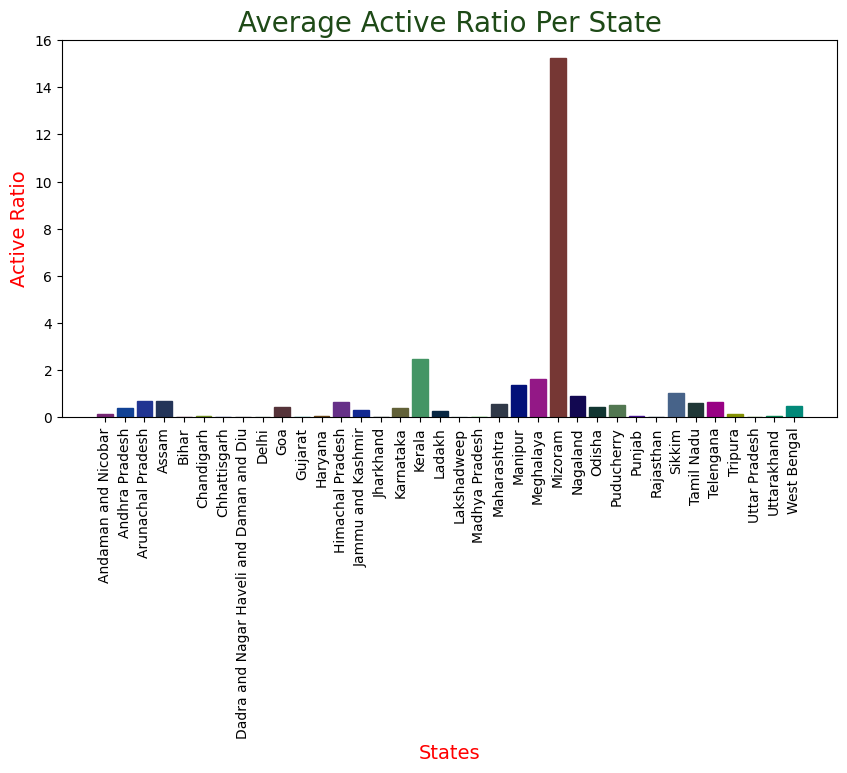

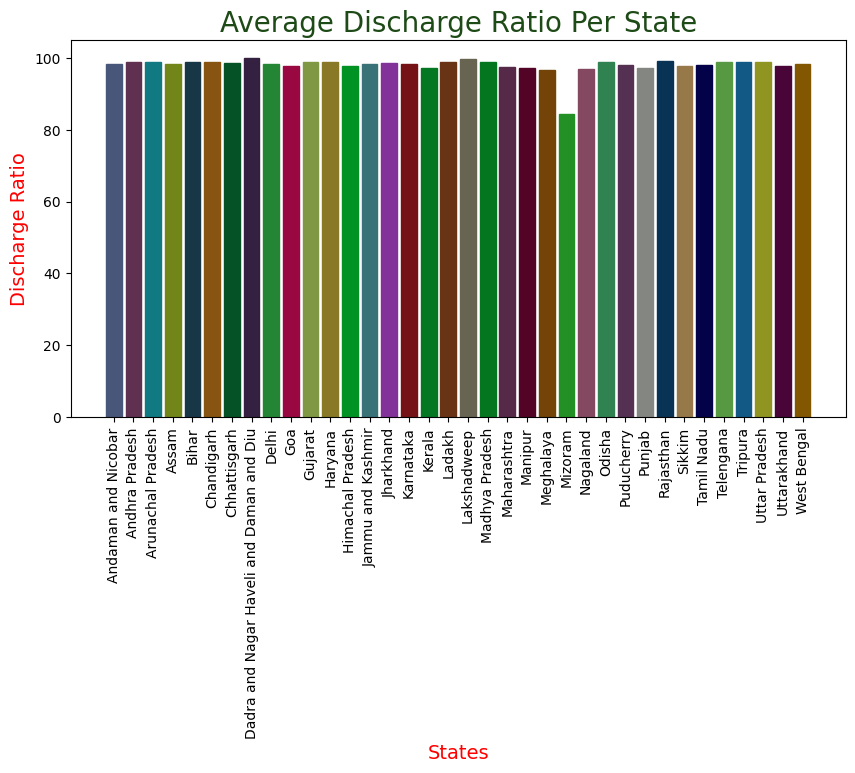

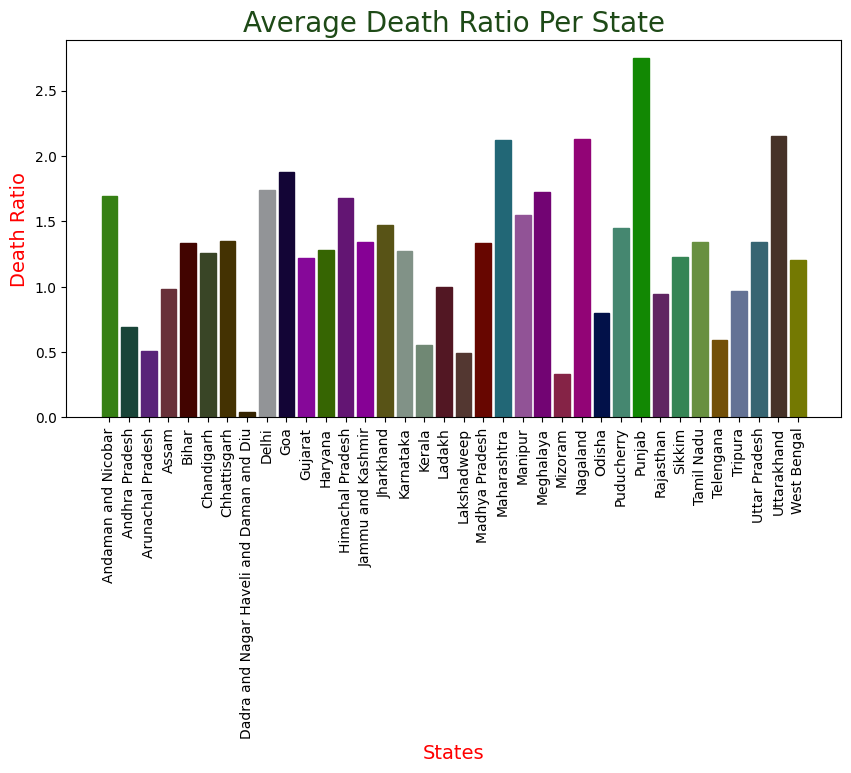

In [13]:
# Creating Plots via Loops 
for num_features in num_col:
    grp_obj = df.groupby('State/UTs').agg({num_features : 'mean'})
    plot_avg(grp_obj.index , grp_obj[num_features])
    print('\n\n\n\n')
    
    


### correlation plots

In [14]:
# Corelation between Total Cases and Deaths
corr = np.corrcoef(df['Total Cases'],df['Deaths'])[0 ,1]
corr

0.888478595084136

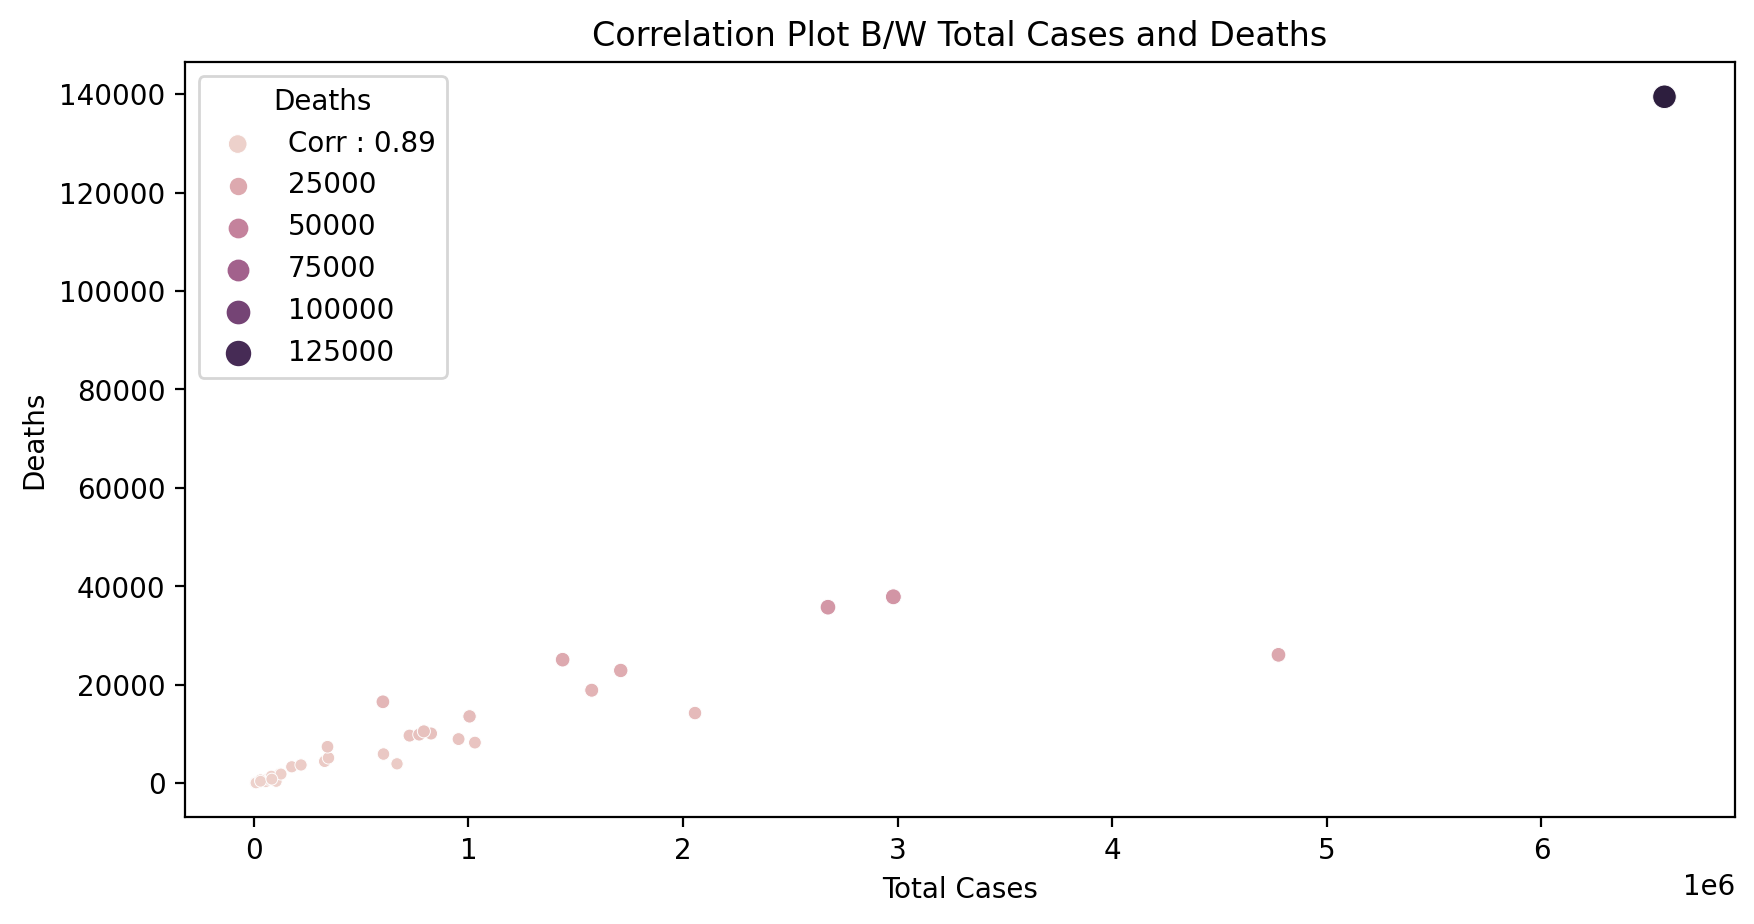

In [15]:
plt.figure(dpi=200 , figsize=(10,5))
plt.title('Correlation Plot B/W Total Cases and Deaths')
sns.scatterplot(x=df['Total Cases'] ,y=df['Deaths'],data=df ,label=f'Corr : { corr :.2f}' , hue='Deaths', size='Deaths'  ,)
plt.show()

In [16]:
# Corelation between Total Cases and Discharged
np.corrcoef(df['Total Cases'],df['Discharged'])[0 ,1]

0.9999732004155291

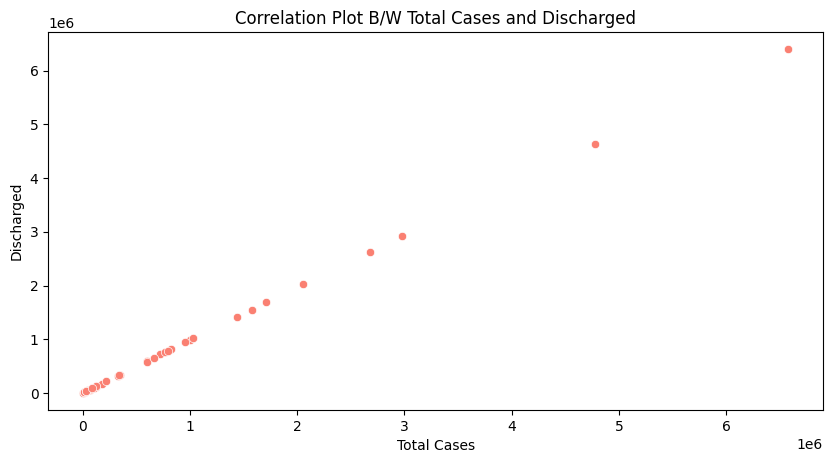

In [17]:
# Since the corelation is 99.99% Hence we can say that 
# no. Discharged  totally depends on Total Cases

plt.figure(dpi=100 , figsize=(10,5))
plt.title('Correlation Plot B/W Total Cases and Discharged')
sns.scatterplot(x=df['Total Cases'] ,y=df['Discharged'] ,color='salmon')
plt.show()

In [18]:
# Corelation between Total Cases and Active
np.corrcoef(df['Total Cases'],df['Active'])[0 ,1]

0.7027514455262812

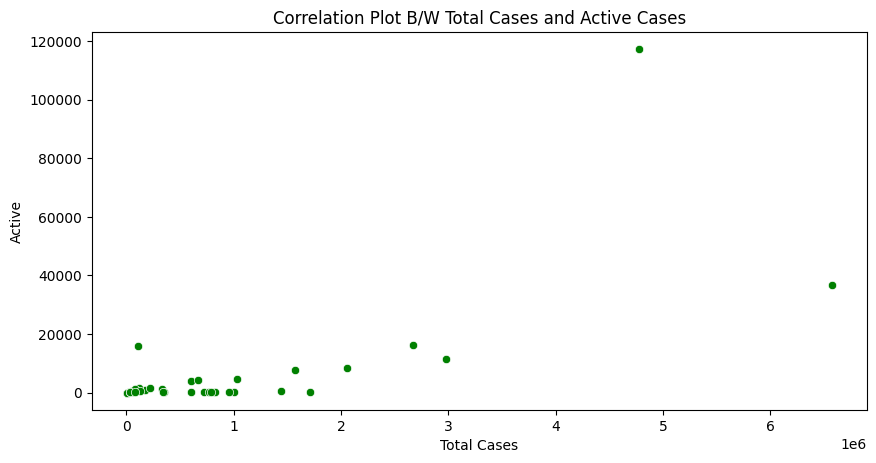

In [19]:
plt.figure(dpi=100 , figsize=(10,5))
plt.title('Correlation Plot B/W Total Cases and Active Cases')
sns.scatterplot(x=df['Total Cases'] ,y=df['Active'] ,color='Green' )
plt.show()